In [1]:
import requests
import csv
from io import StringIO
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
r = requests.get('http://api.clubelo.com/Arsenal')

In [3]:
r.status_code

200

In [5]:
#r.text

In [7]:
df = StringIO(r.text)
data = pd.read_csv(df,sep=",")
data.head()

,Rank,Club,Country,Level,Elo,From,To
0,None,Arsenal,ENG,1,1551.140259,1946-07-07,1946-08-31
1,None,Arsenal,ENG,1,1539.570068,1946-09-01,1946-09-04
2,None,Arsenal,ENG,1,1525.449463,1946-09-05,1946-09-07
3,None,Arsenal,ENG,1,1523.855591,1946-09-08,1946-09-11
4,None,Arsenal,ENG,1,1518.939331,1946-09-12,1946-09-14


In [8]:
data.From = pd.to_datetime(data['From'])
data.To = pd.to_datetime(data['To'])

In [9]:
data.head()

,Rank,Club,Country,Level,Elo,From,To
0,None,Arsenal,ENG,1,1551.140259,1946-07-07,1946-08-31
1,None,Arsenal,ENG,1,1539.570068,1946-09-01,1946-09-04
2,None,Arsenal,ENG,1,1525.449463,1946-09-05,1946-09-07
3,None,Arsenal,ENG,1,1523.855591,1946-09-08,1946-09-11
4,None,Arsenal,ENG,1,1518.939331,1946-09-12,1946-09-14


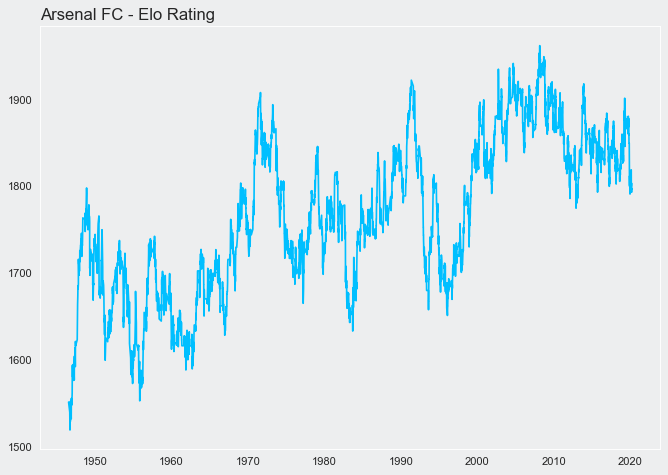

In [16]:
sns.set_style("dark")
fig = plt.figure(num=None,figsize=(10,7),dpi=80)
axes = fig.add_subplot(1, 1, 1, facecolor='#edeeef')
fig.patch.set_facecolor('#edeeef')

plt.plot(data.From, data.Elo,'-', color="deepskyblue")

#Set a title, write it on the left hand side
plt.title("Arsenal FC - Elo Rating", loc="left", fontsize=15)

plt.show()

In [39]:
def plotClub(team,colour):
    r = requests.get("http://api.clubelo.com/"+str(team))
    
    df = StringIO(r.text)
    data = pd.read_csv(df,sep=",")
    
    data.From = pd.to_datetime(data['From'])
    data.To = pd.to_datetime(data['To'])
    
    sns.set_style("dark")
    fig = plt.figure(num=None,figsize=(10,7),dpi=80)
    axes = fig.add_subplot(1, 1, 1, facecolor='#000000')
    fig.patch.set_facecolor('#A9A9A9')

    plt.plot(data.From, data.Elo,'-', color=colour)

    #Set a title, write it on the left hand side
    plt.title("   " + str(team) + " - Elo Rating", loc="left", fontsize=15)

    plt.show()

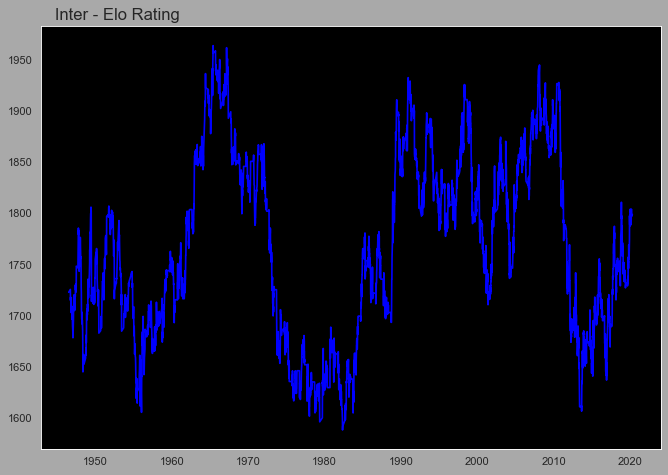

In [42]:
plotClub('Inter',"blue")

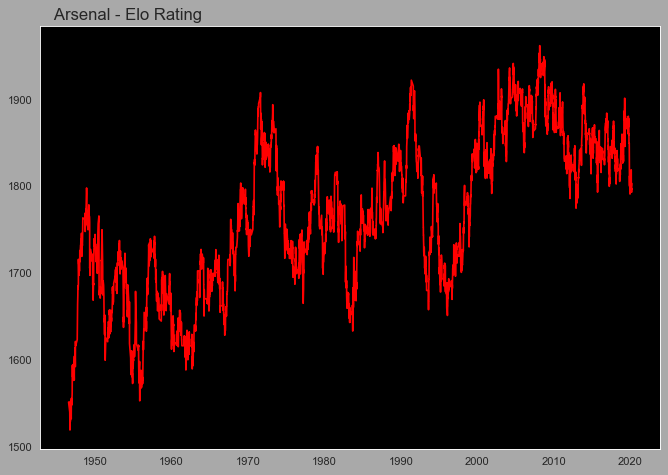

In [43]:
plotClub("Arsenal","red")

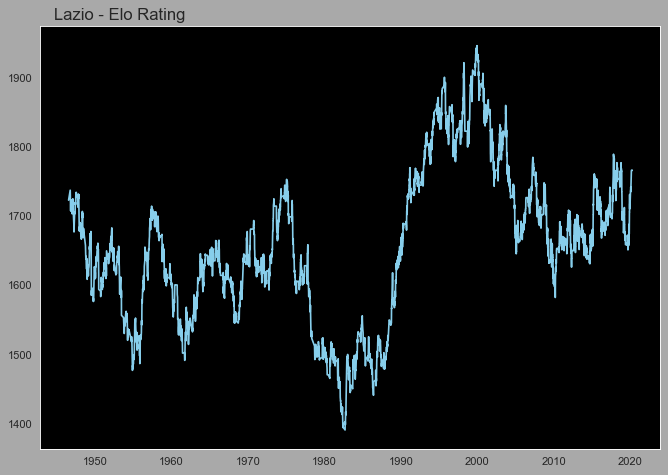

In [45]:
plotClub("Lazio","skyblue")